# Dracula - beyond the blood and gore 
## An investigation into the numbers behind the Count Dracula

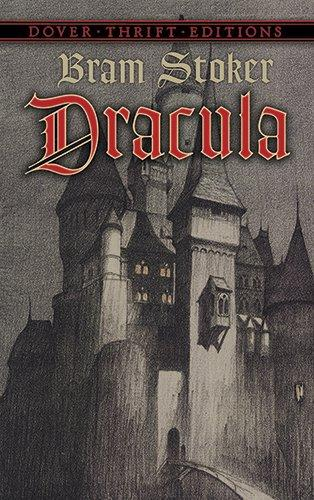

In [1]:
#Import library
from IPython.display import Image
# Load image 
Image(filename = "dracula_book_cover.jpg", width = 600, height = 300)

I will proceed to analyse a book that is very famous all over the world but not so famous in my own country. Ironically, the action takes place in my country of origin. <br>
The country is **Romania** - and the book is **Dracula**.<br> 
I hope this analysis will make the readers interested in the book, maybe even enough to read it in order to confirm my results.<br>

# PART 1

## For this analysis I will use 3 data sets:
### 1. The text of the book, which I am going to scrape from a website that hosts the entire book - https://www.gutenberg.org/files/345/345-h/345-h.htm
#### a.	the website also offers other information unrelated to the book. I will have to clean the data before importing it into a file (just the body). For this I will use Beautiful Soup library. 
#### b.	next, I will have to clean the imported file as well so the end result will contain just the book data. For this I will use some python code to remove some lines from the beginning / end of the scraped text file.

### 2.	A list of the most common used words in the English language. I plan to make a word cloud from the book data, using this to outline the subject of the book. Removing the most common words in the language will leave a clearer image on the word cloud.<br>
I used a list provided on a Wikipedia page: https://en.wikipedia.org/wiki/Most_common_words_in_English 
Here i will scrape a dataframe that is containing my needed information. From the data frame I will keep just the column with the words, and I will transform it into a list. This list will be confronted with the book in order to remove any appearances of those words in the book. 


### 3.	A third list that I will build myself, looking at the most 100 frequent words and removing those that don't have specific meaning to the analysis. I would say this is the biggest weakness of my project because it is the least scientifical part of the project, relying more on common sense. 

## <font color=green>Start</font>

In [2]:
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path, getcwd
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

Load the webpage content and verify it s working (200 OK)

In [3]:
r = requests.get('https://www.gutenberg.org/files/345/345-h/345-h.htm')
print(r.status_code)

200


Get the entire book in a text file

In [4]:
soup=bs(r.content)
#print(soup.prettify())
tag = soup.body
for string in tag.strings: 
    f = open("dracula_site.txt", "a")
    print(string, file=f)
    f.close()

Remove all text from before the starting of the book and after the book ending

In [5]:
with open('dracula_site.txt', 'r') as draculain:
    data = draculain.read().splitlines(True)
with open('dracula.txt', 'w') as draculaout:
    draculaout.writelines(data[436:60738])

In [6]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [7]:
# open the file and read it into a variable text file
user_text = open('dracula.txt', 'r').read().lower()
print ('File downloaded and saved!')

File downloaded and saved!


Make a list with all the most 100 common words (prepositions on others) from english (wiki page) to exclude from my analysis

In [8]:
import pandas as pd 
dfs = pd.read_html('https://en.wikipedia.org/wiki/Most_common_words_in_English')
df=dfs[0]
df

Word Parts of speech OEC rank COCA rank[8] Dolch level  Polysemy
0     the         Article        1            1  Pre-primer        12
1      be            Verb        2            2      Primer        21
2      to     Preposition        3         7, 9  Pre-primer        17
3      of     Preposition        4            4     Grade 1        12
4     and     Conjunction        5            3  Pre-primer        16
..    ...             ...      ...          ...         ...       ...
95  these         Pronoun       96           82         NaN         2
96   give            Verb       97           98         NaN        19
97    day            Noun       98           90         NaN         9
98   most          Adverb       99     144, 187         NaN        12
99     us         Pronoun      100          113         NaN         6

[100 rows x 6 columns]

In [9]:
#keep just to column words, and turn it into a list to be later used
stopwords_wiki = df["Word"].tolist()
print(stopwords_wiki)

['the', 'be', 'to', 'of', 'and', 'a', 'in', 'that', 'have', 'I', 'it', 'for', 'not', 'on', 'with', 'he', 'as', 'you', 'do', 'at', 'this', 'but', 'his', 'by', 'from', 'they', 'we', 'say', 'her', 'she', 'or', 'an', 'will', 'my', 'one', 'all', 'would', 'there', 'their', 'what', 'so', 'up', 'out', 'if', 'about', 'who', 'get', 'which', 'go', 'me', 'when', 'make', 'can', 'like', 'time', 'no', 'just', 'him', 'know', 'take', 'people', 'into', 'year', 'your', 'good', 'some', 'could', 'them', 'see', 'other', 'than', 'then', 'now', 'look', 'only', 'come', 'its', 'over', 'think', 'also', 'back', 'after', 'use', 'two', 'how', 'our', 'work', 'first', 'well', 'way', 'even', 'new', 'want', 'because', 'any', 'these', 'give', 'day', 'most', 'us']


In [10]:
# open the file and read it into a variable text file
user_text = open('dracula.txt', 'r').read().lower()
print ('File downloaded and saved!')

File downloaded and saved!


In [11]:
#make a list with all the words from the book 
with open("dracula.txt") as f:
    the_list = sorted(word.strip(",") for line in f for word in line.split())

In [12]:
#remove capital letter
the_list1=[x.lower() for x in the_list]

Lets find out the total number of words and the words avarage length

In [13]:
#make a dataframe from the list 
df_avarage_word = pd.DataFrame(the_list1) 
df_avarage_word=df_avarage_word[0].value_counts()
#insert index
df_avarage_word=df_avarage_word.reset_index()
#rename columns
df_avarage_word=df_avarage_word.rename(columns = {'index':'word'})
df_avarage_word=df_avarage_word.rename(columns = {0:'frec'})
df_avarage_word2=df_avarage_word[df_avarage_word['word'].map(len) > 2]

#total words
total_words = df_avarage_word2['frec'].sum()
print('The book Dracula has', total_words, ' words.')
print('The average reader will spend', total_words/300, ' minutes reading this book at 300 words per minute.')
#total caracters
df_avarage_word2['name_length']  = df_avarage_word2['word'].str.len()
total_length = (df_avarage_word2['name_length']*df_avarage_word2['frec']).sum()

word_avarage=total_length/total_words
print('The words have an avarage of',word_avarage, 'letters')

The book Dracula has 247792  words.
The average reader will spend 825.9733333333334  minutes reading this book at 300 words per minute.
The words have an avarage of 4.846968425130755 letters


C:\Users\liviu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [14]:
#remove most comon words that i scraped from the wiki page
the_list2=[x for x in the_list1 if x not in stopwords_wiki]

In [15]:
#make a dataframe from the list in order to check the words that have the highest freqvency
df = pd.DataFrame(the_list2) 
df_freq=df[0].value_counts()
#insert index
df_freq=df_freq.reset_index()
#rename columns
df_freq=df_freq.rename(columns = {'index':'word'})
df_freq=df_freq.rename(columns = {0:'frec'})
df_freq

word  frec
0              i  9054
1            was  3697
2             is  2956
3            had  2067
4            are  1147
...          ...   ...
15479  calculate     1
15480   contract     1
15481    depends     1
15482  deletions     1
15483    author:     1

[15484 rows x 2 columns]

In [16]:
#remove oall the words smaller than 5 characters 
df_without_small_words=df_freq[df_freq['word'].map(len) > 4]
pd.set_option('display.max_rows', None)
df_without_small_words.head(5)


word  frec
7     shall   840
18  helsing   539
20   before   507
21   seemed   486
25   though   430

In [17]:
#make a second list with specific words from the book that i dont want in the word cloud
stopwords_subjectiv=['said:—','again','thing','again.','against','almost','along','already','always','amongst','anything','around','asked','became','before','before','began','behind','being','better','between','called','close','coming','dont','enough','every','evidently','friend','going','great','great','happy','heavy','himself','horses','however','indeed','instant','later','little','little','lucys','matter','might','might','moved','myself','night','night.','nothing','opened','others','passed','perhaps','present','project','quite','ready','right','room.','round','said:','seemed','seemed','seems','september.','shall','shall','should','should','simply','since','something','sound','speak','spoke','still','strong','suppose','taken','them.','things','those','though','though','thought','three','through','through','time.','times','together','towards','tried','trust','under','until','voice','wanted','watch','where','where','while','whilst','whole','within','without','words','world','write']
stop=stopwords_wiki+stopwords_subjectiv

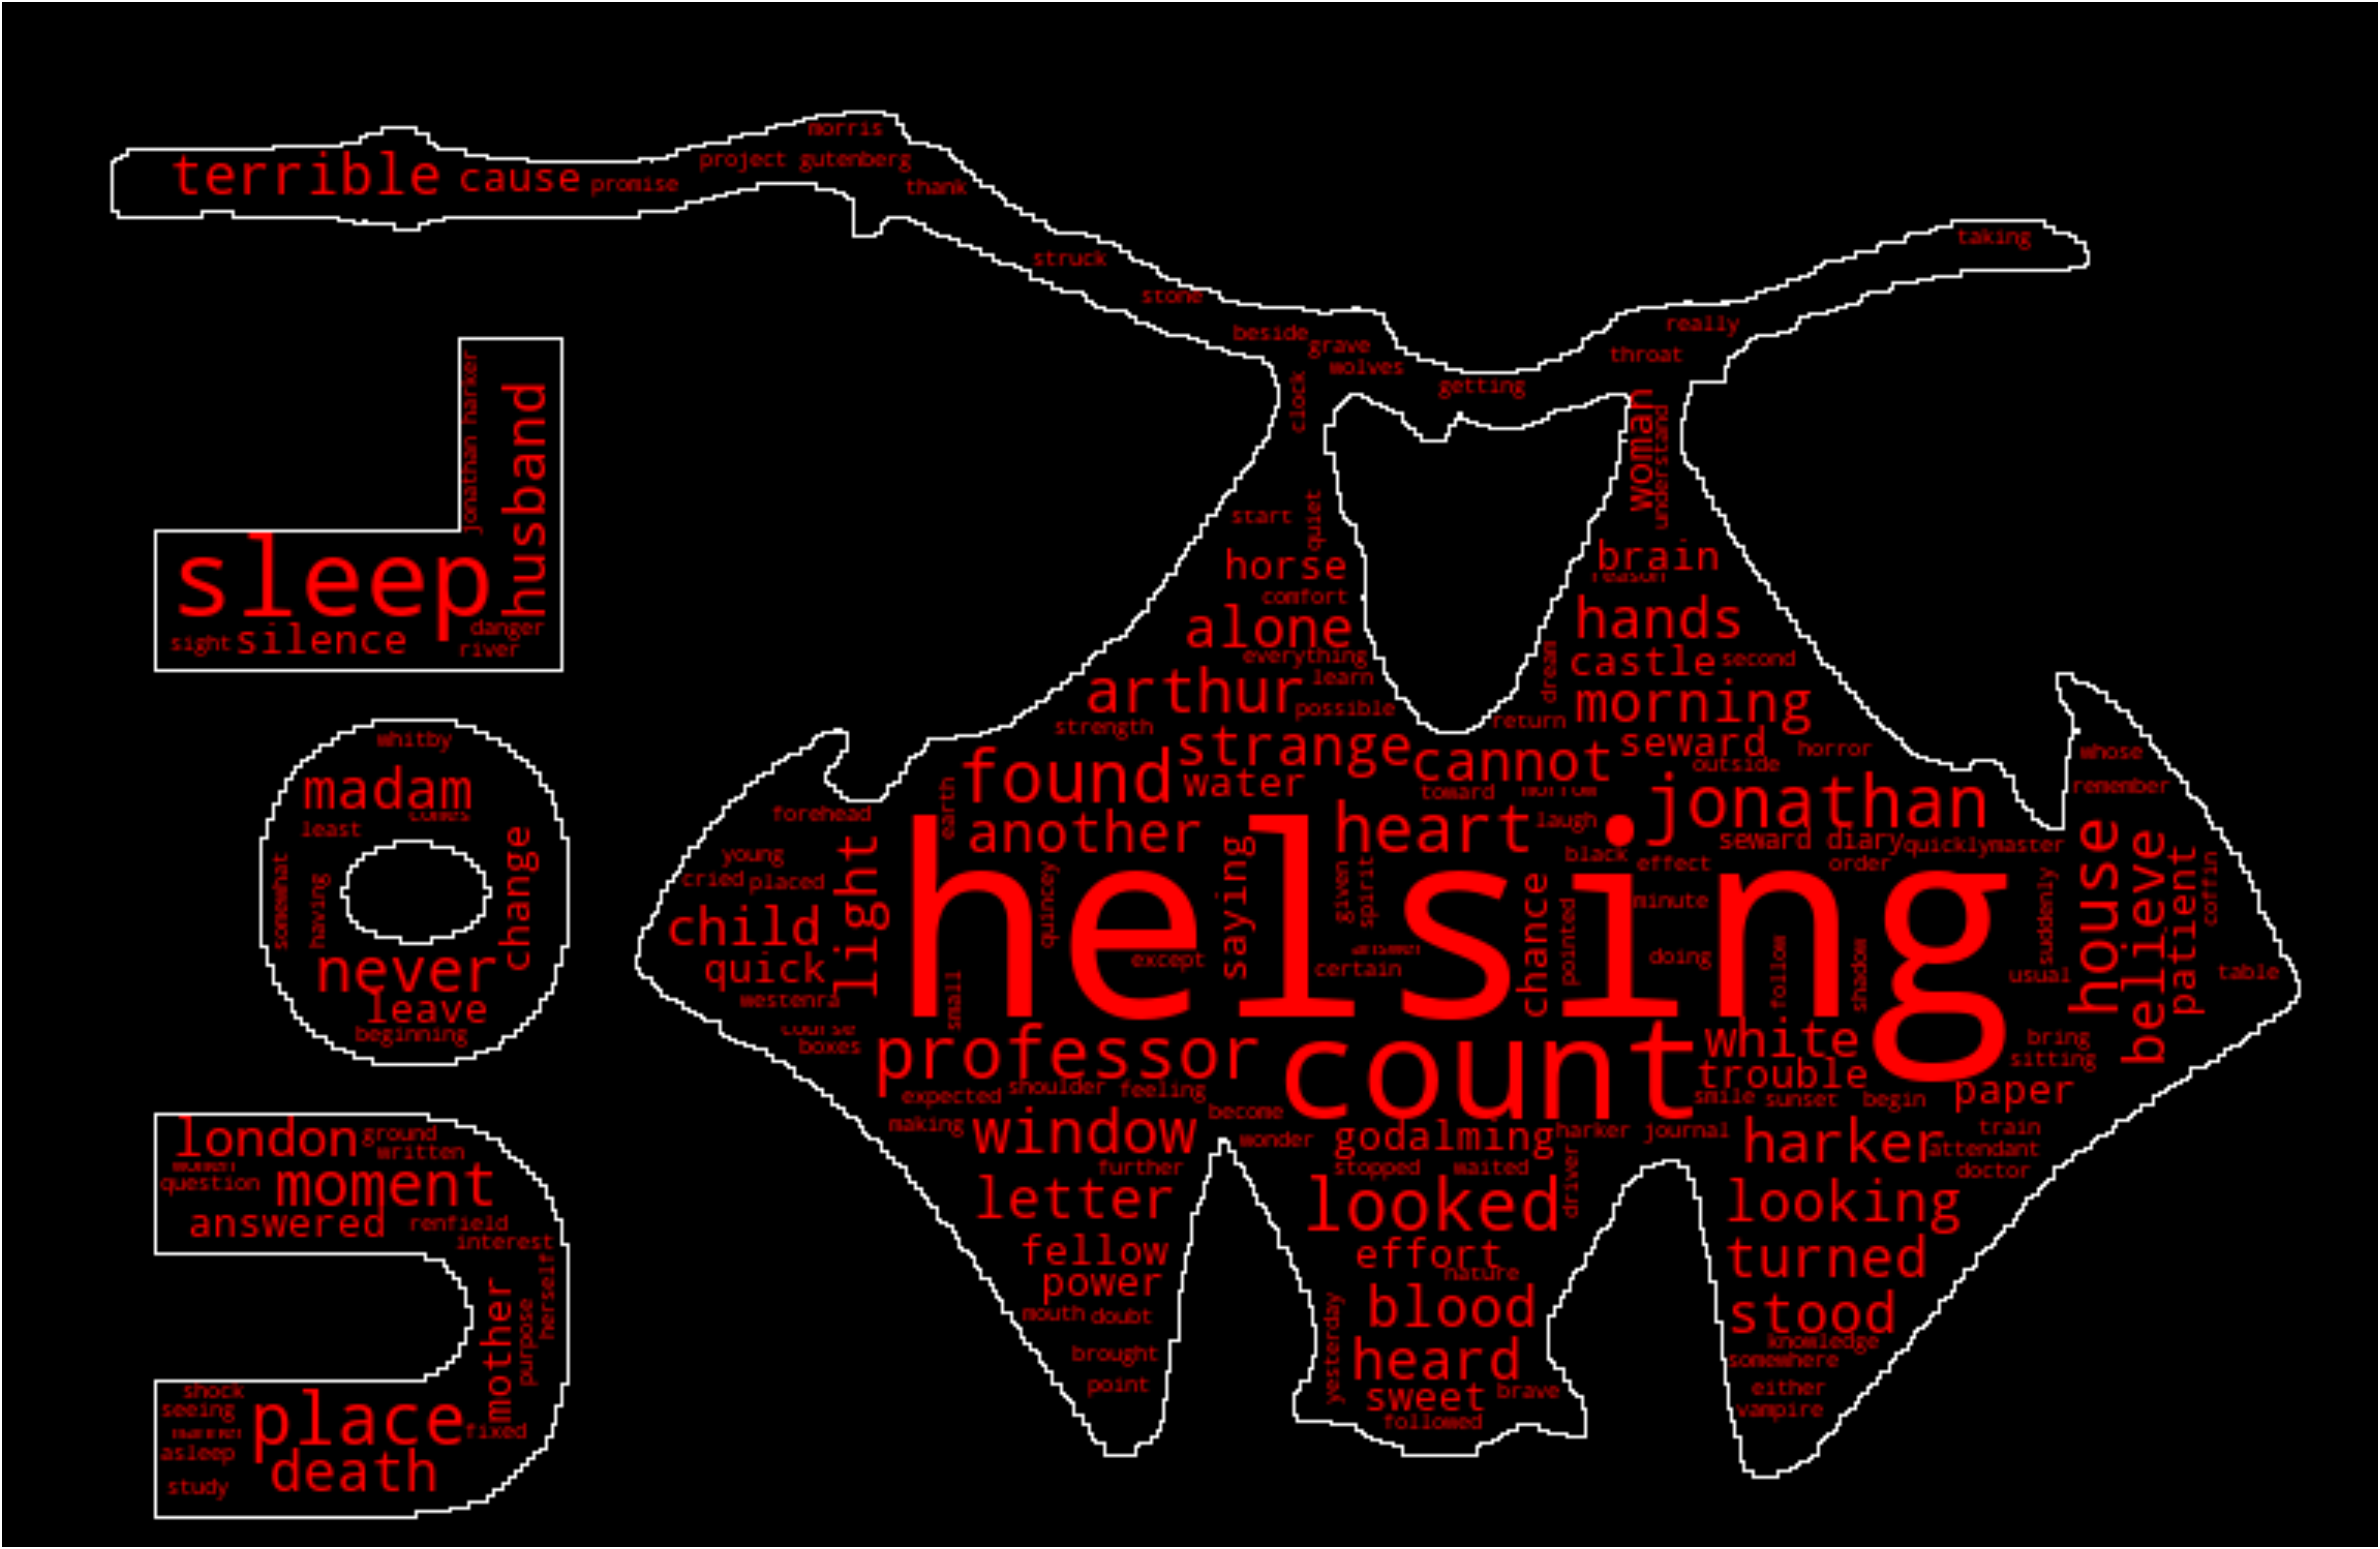

In [18]:
d = getcwd()
## image from ae01.alicdn.com/kf/Ha0c7473995334761a9e08cbb92ba31fdu/Bat-Hanging-Upside-Down-On-A-Branch-Happy-Halloween-Party-Decorative-Wall-Decals-for-Bedroom-Living.jpg_960x960.jpg
##after downloding it I made it more sharper using just black an whites
mask = np.array(Image.open(path.join(d, "dracula_sharp1.png")))
wc = WordCloud(background_color="black", max_words=1000, mask=mask, stopwords=stop,
               min_word_length=5, contour_color="white", contour_width=1, min_font_size=6, max_font_size=90, font_step=2, random_state=42)
wc.generate(user_text)
plt.figure(figsize=[200,100])
plt.imshow(wc.recolor(color_func=lambda *args, **kwargs: (255,0,0)), interpolation="bilinear")
plt.axis("off")
_=plt.show()

# PART 2

## For part 2 have obtain the appropriate data set compose:
### 1.	 From the book:
#### a.   made a list with all the words in the book
#### b.	made all the words small letter
#### c.	removed all the top 100 most common words in English language 
#### d.	made a data frame with all the words and their frequency
#### e.	removed all the small words (less than 5 letters)

### 2.	The top 100 most common words in English language (scraped from wiki-page with Beautiful Soup)


## The resulting data was manipulated in different forms: 
### 1.	 merged
### 2.	 sorted
### 3.	removing duplicates 
### 4.	combining column
### 5.	indexed 
### 6.	applied different functions

### I obtain a mining full statistical value looking at number of words and the average word length. <br>I found it have **247.792 words** and the words have an average of **4,84 letters**.
#### The average reader will spend **825 minutes** reading this book at 300 words per minute.
#### The **average word length** in English language is 4.7 characters, and in Dracula is **4,84 letters**.<br>I draw the conclusion from hire that this is not a very sophisticated book, but rather one that is accessible to a large variety of readers. 


### For the last step of the analysis i chose a **word cloud** to quickly communicate at a glance the most important information. Having such a dark and hard topic I though a funnier picture will do better in the long run. I also put The University of London abbreviation because a little bit of advertising never hurt anybody. I think that the words depicted in the picture surprise the gloomy atmosphere of the book: blood, night, heart, widow, etc. You can also see the main characters there: Van Helsing, Jonathan Harker, Quincy.

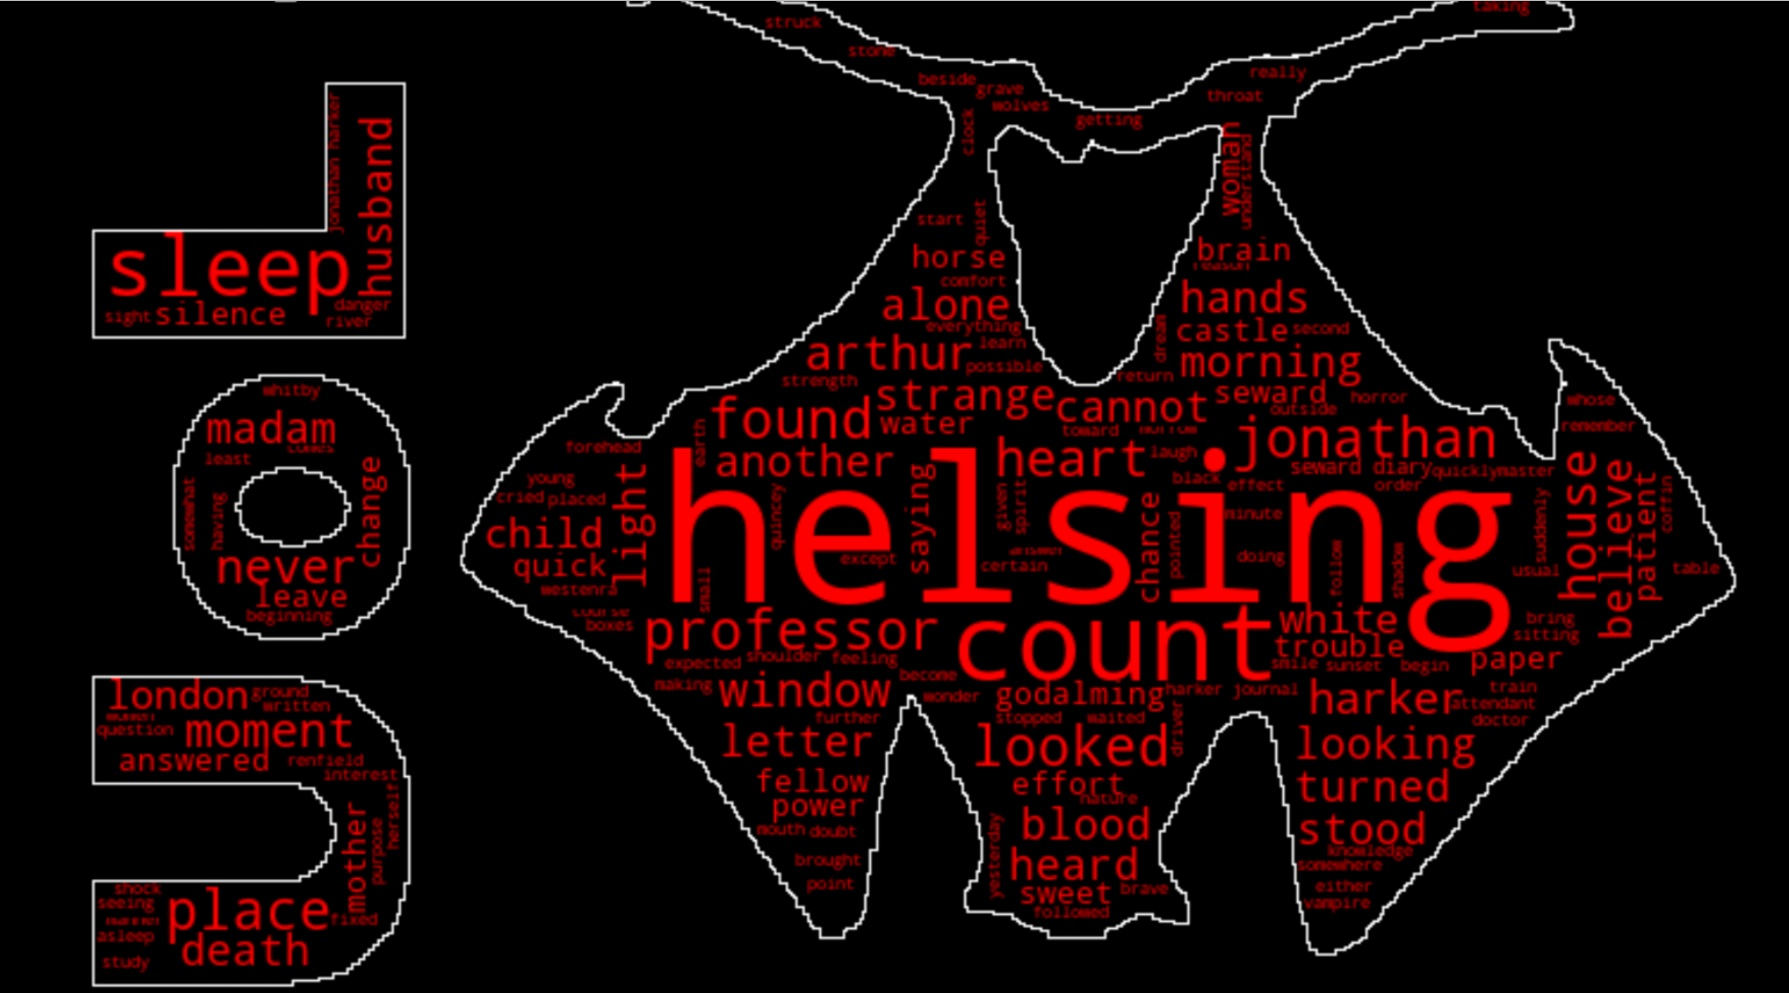

In [19]:
from IPython.display import Image
Image(filename = "dracula wordcloud.jpg", width = 600, height = 300)

## Conclusion and further work
### The work was satisfying, and I obtain the expected results: the length of the books suggests the estimated reading time, the average length of words is very close to the average length of all English words. The word cloud captures a glimpse of the book atmosphere. The weakest point of the project is the subjective list of words that were excluded from the analyse (stopwords_subjectiv). Fortunately, the book and the data tell the same story. 
### Further work should concentrate on Sentiment analysis and other Natural Language Processing methods.


## References
- https://www.gutenberg.org/files/345/345-h/345-h.htm 
- https://en.wikipedia.org/wiki/Most_common_words_in_English
- http://ae01.alicdn.com/kf/Ha0c7473995334761a9e08cbb92ba31fdu/Bat-Hanging-Upside-Down-On-A-Branch-Happy-Halloween-Party-Decorative-Wall-Decals-for-Bedroom-Living.jpg_960x960.jpg